In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\input_layer_4_6_13_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [4]:
with open ('C:\\Users\\Wilfred\\Desktop\\Look-ahead-N\\output_layer_4_6_13_2.pickle','rb') as file:
    output_data = pickle.load(file)
output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 130, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/130
100000/100000 - 4s - loss: 0.3724 - accuracy: 0.8440 - val_loss: 0.2979 - val_accuracy: 0.8718
Epoch 2/130
100000/100000 - 2s - loss: 0.2781 - accuracy: 0.8788 - val_loss: 0.2611 - val_accuracy: 0.8868
Epoch 3/130
100000/100000 - 2s - loss: 0.2466 - accuracy: 0.8922 - val_loss: 0.2416 - val_accuracy: 0.8946
Epoch 4/130
100000/100000 - 2s - loss: 0.2247 - accuracy: 0.9027 - val_loss: 0.2267 - val_accuracy: 0.9024
Epoch 5/130
100000/100000 - 3s - loss: 0.2047 - accuracy: 0.9112 - val_loss: 0.1977 - val_accuracy: 0.9142
Epoch 6/130
100000/100000 - 2s - loss: 0.1874 - accuracy: 0.9172 - val_loss: 0.1866 - val_accuracy: 0.9168
Epoch 7/130
100000/100000 - 2s - loss: 0.1750 - accuracy: 0.9208 - val_loss: 0.1795 - val_accuracy: 0.9186
Epoch 8/130
100000/100000 - 2s - loss: 0.1642 - accuracy: 0.9243 - val_loss: 0.1654 - val_accuracy: 0.9241
Epoch 9/130
100000/100000 - 2s - loss: 0.1568 - accuracy: 0.9269 - val_loss: 0.1591 - val_accu

Epoch 77/130
100000/100000 - 2s - loss: 0.0388 - accuracy: 0.9847 - val_loss: 0.0629 - val_accuracy: 0.9771
Epoch 78/130
100000/100000 - 2s - loss: 0.0371 - accuracy: 0.9854 - val_loss: 0.0733 - val_accuracy: 0.9740
Epoch 79/130
100000/100000 - 2s - loss: 0.0379 - accuracy: 0.9853 - val_loss: 0.0645 - val_accuracy: 0.9766
Epoch 80/130
100000/100000 - 2s - loss: 0.0358 - accuracy: 0.9860 - val_loss: 0.0690 - val_accuracy: 0.9769
Epoch 81/130
100000/100000 - 2s - loss: 0.0356 - accuracy: 0.9861 - val_loss: 0.0690 - val_accuracy: 0.9762
Epoch 82/130
100000/100000 - 2s - loss: 0.0360 - accuracy: 0.9860 - val_loss: 0.0680 - val_accuracy: 0.9775
Epoch 83/130
100000/100000 - 2s - loss: 0.0355 - accuracy: 0.9862 - val_loss: 0.0661 - val_accuracy: 0.9774
Epoch 84/130
100000/100000 - 2s - loss: 0.0341 - accuracy: 0.9869 - val_loss: 0.0675 - val_accuracy: 0.9770
Epoch 85/130
100000/100000 - 2s - loss: 0.0361 - accuracy: 0.9859 - val_loss: 0.0705 - val_accuracy: 0.9766
Epoch 86/130
100000/100000 -

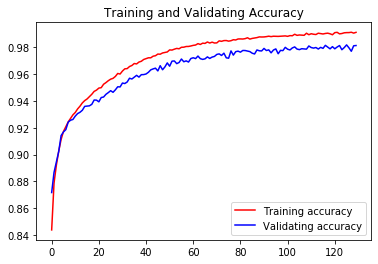

In [7]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [8]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Look_ahead_N\\Look_ahead_N_4_6_13_2_model.h5')